## Intro & Motivation

A lot of results in number theory (especially analytic number theory) reveal fundamental patterns in real numbers, rational/irrational numbers, integers, and probably most importantly, primes. Some of the patterns can be nicely visualized using computational methods so that people like me can (hopefully) be convinced that these patterns are indeed correct. <br>
A couple of examples are presented in this notebook.

In [134]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [135]:
%matplotlib inline

## 1. Weyl's Equidistribution Theorem
People are very interested in analyzing sequences in $R$. In the context of real analysis, people usually start by considering the convergence of such sequence. While convergence tells us many things about the sequence, especially the "tail" of the sequence, many sequences tend not to be convergent and there all still a lot of interesting things to study about these sequences. One thing that people are interested in is characterizing the spread of a sequence of real numbers over an interval. To make this precise, we have the following definition. <br>

**Definition 1.1:** A sequence of real numbers $\{\xi_n\}_{n=1}^{\infty}$ in $[0,1)$ is **equidistributed** if for every interval $(a, b)\subset[0, 1)$, we have

$$
\lim_{N\to\infty} \frac{\#\{1\leq n\leq N: \xi_n\in(a,b)\}}{N} = b-a
$$

The equidistribution of a sequence essentially tells us that the sequence is spread quite evenly over an interval, and every subinterval gets it own "share" of the sequence. It is obvious that this is a much stronger assertion that the sequence, viewed as a set, is dense in an interval. <br>
Another thing that we need to define before getting into Weyl's Equidistribution Theorem is the **fractional part** of a number. The reason that we examine the fractional part is that it brings us naturally into the interval $[0, 1)$. <br>

**Definition 1.2:** The **integer part** of a real number $x$ is the largest integer that is less than or equal to x, and we use $[x]$ to denote the integer part of $x$. The **fractional part** of a real number $x$ is defined as $x - [x]$, usually denoted by $\{x\}$, but for the sake of clarity, detoned by $\langle x\rangle$ here.

Now we are ready to state Weyl's Equidistribution Theorem. <br>

**Theorem 1.3 (Weyl's Equidistribution Theorem):** If $\gamma$ is an irrational number, then the sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \langle n\gamma\rangle$, is equidistributed in $[0, 1)$.

I will not prove this theorem here since it requires some machinery in real analysis and fourier analysis. The idea is to reformulate the problem in terms of convergence of functions involving the characteristic function. Then approximate characteristic functions using continuous functions (trigonometric polynomials) and apply some convergence theorems for continuous functions. <br>
One thing to note is that we do need $\gamma$ to be irrational here since for a rational number $\alpha$, write $\alpha = p/q$, then consider the first q terms in the sequence $\{\langle n\alpha\rangle\}_{n=1}^{\infty}: \langle \frac{p}{q}\rangle, \langle \frac{2p}{q}\rangle,..., \langle \frac{qp}{q}\rangle$. The next term is $\langle \frac{(q+1)p}{q}\rangle = \langle 1+\frac{p}{q}\rangle = \langle \frac{p}{q}\rangle$. Therefore the sequence is going to repeat itself starting from here. <br>
And for $\alpha$ an irrational number, the sequence is never going to repeat itself, in fact, we cannot have repeated terms in the sequence. To see this, suppose $\langle n_1\alpha\rangle = \langle n_2\alpha\rangle$ for some integers $n_1, n_2$, this means $n_1\alpha - n_2\alpha$ is an integer since both have the same fractional part, so $\alpha$ is rational, contradiction. <br>
Alright, this is probably where I should stop from talking about more math. Let's visualize the equidistribution of this sequence. <br>

To do this, we need to examine the limit as in the definiton of equidistribution, so we need a (large) value of $N$. And of course we need an irrational number $\gamma$. Then we need to generate first $N$ terms of the sequence $\{\langle n\gamma\rangle\}_{n=1}^{\infty}$ 

In [204]:
gamma = np.sqrt(3)
N = 10000

def first_N_terms_weyl(gamma, N):
    result = []
    for i in np.arange(1, N + 1):
        result.append(i * gamma - math.floor(i * gamma))
    return result

sequence_weyl = first_N_terms_weyl(gamma, N)

I generated 11 random numbers in $[0, 1)$, construct 10 subintervals out of them, compute $\frac{\#\{1\leq n\leq N: \xi_n\in(a,b)\}}{N}$ for each subinterval, and compare the empirical result with the expected result. The following is a simple pipeline that does this and also gives a scatter plot of the sequence within $[0, 1)$.  

In [205]:
def within_interval(sequence, a, b):
    within = []
    for num in sequence:
        if (a < num) and (b > num):
            within.append(num)
    return (round(a, 4), round(b, 4)), len(within), b-a

def sample_interval(num_interval):
    sample = np.random.rand(num_interval - 1)
    sample = sorted(sample)
    return [0] + list(sample) + [1]

def visualize_equidistribution(sequence, num_interval, step_size):
    plt.figure()
    plt.scatter(sequence, list(range(len(sequence))))
    plt.yticks([])
    
    sample = sample_interval(num_interval)
    result = dict()
    
    steps = list(range(0, len(sequence), step_size))
    if len(sequence) % step_size != 1:
        steps.append(len(sequence) - 1)
        
    for i in range(len(steps) - 1):
        for j in range(len(sample) - 1):
            interval, actual, expected = within_interval(sequence[steps[i]:steps[i + 1]], sample[j], sample[j + 1])
            if j in result.keys():
                result[j][1].append((steps[i] * result[j][1][-1] + actual) / min(steps[i + 1], len(sequence))) 
            else:
                result[j] = interval, [actual / min(step_size, len(sequence))], expected
    
    num_plots = len(sample) - 1
    fig, ax = plt.subplots(nrows = math.ceil(num_interval / 3), ncols = 3, figsize=(15,15))
    for j in range(num_plots):
        row_id, col_id = j // 3, j % 3
        ax[row_id, col_id].plot(steps[1:], result[j][1])
        ax[row_id, col_id].axhline(result[j][2], color='black', ls = '--')
        ax[row_id, col_id].title.set_text(result[j][0])
        
    for j in range(num_plots, math.ceil(num_interval / 3) * 3):
        fig.delaxes(ax[j // 3][j % 3])

    plt.show()

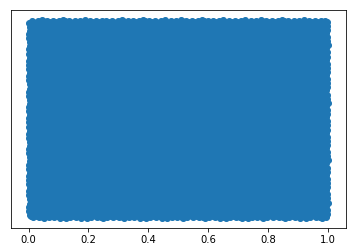

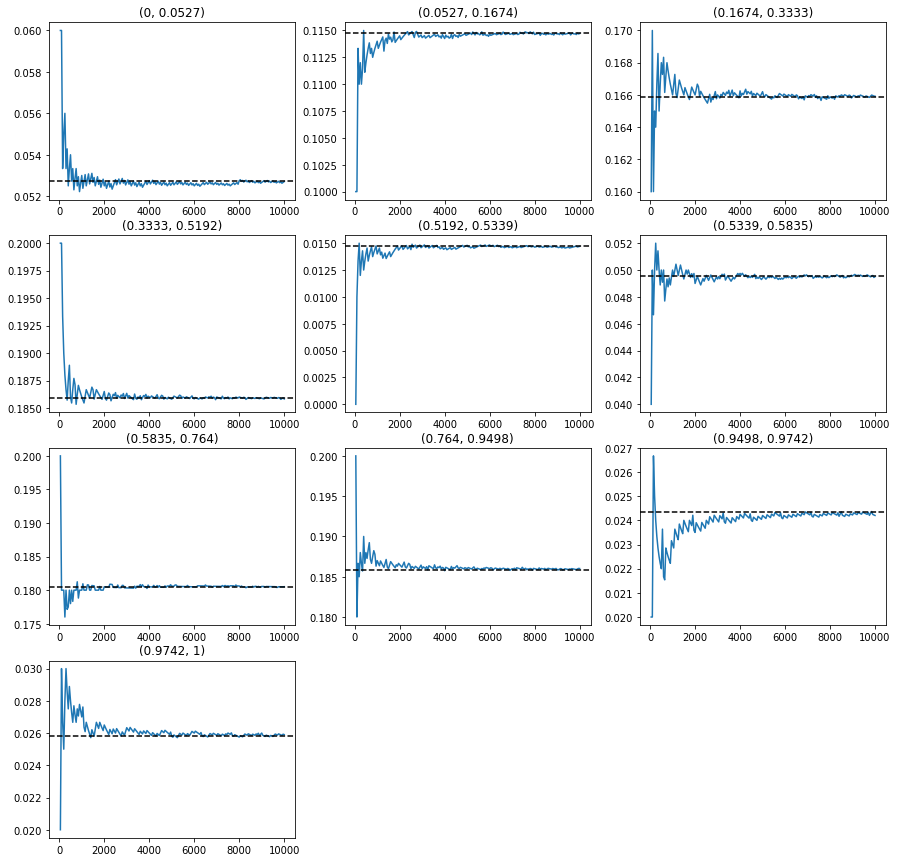

In [206]:
visualize_equidistribution(sequence_weyl, 10, 50)

The difference between actual proportion and expected proportion is very small for all intervals, so empirically Weyl's Equidistribution Theorem holds true (well, it has to). <br>
A more thorough study of equidistribution reveals more examples of equidistributed/non-equidistributed sequences, which can be easily visualized given the pipeline above.

**Proposition 1.4:** The sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \bigg \langle\left(\frac{1+\sqrt{5}}{2}\right)^n\bigg \rangle$, is not equidistributed in $[0, 1)$.

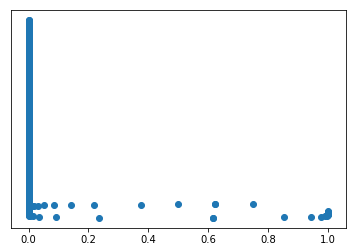

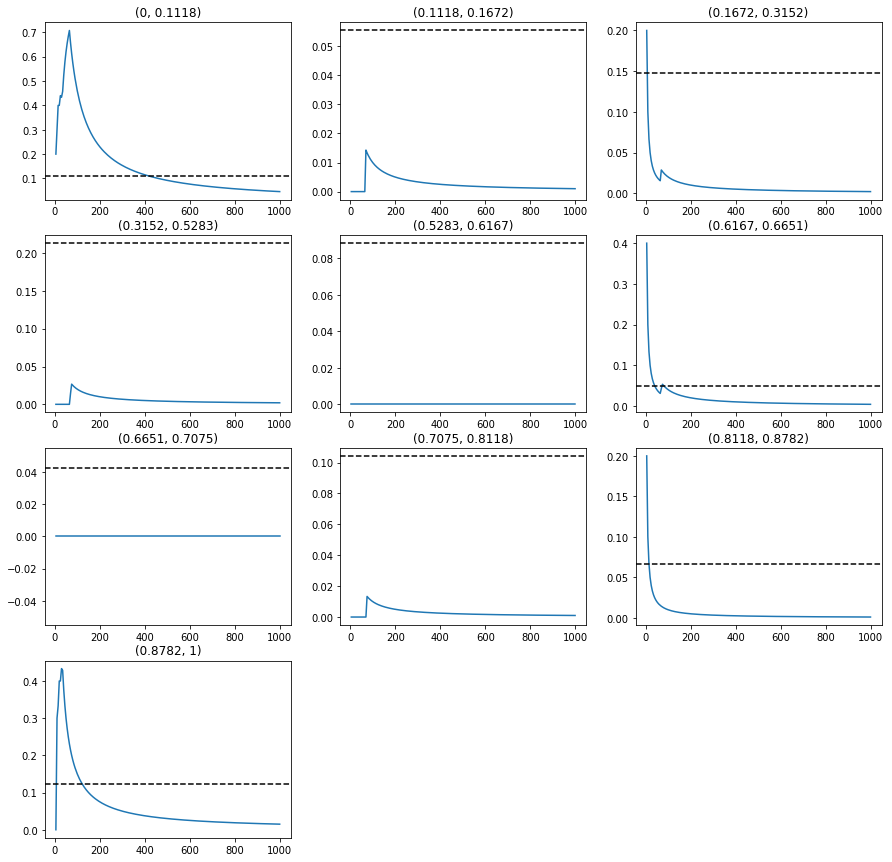

In [209]:
N = 1000

def first_N_terms_golden_ratio(N):
    result = []
    golden_ratio = (1 + np.sqrt(5)) / 2
    for i in np.arange(1, N+1):
        result.append(golden_ratio**i - math.floor(golden_ratio**i))
    return result

sequence_golden_ratio = first_N_terms_golden_ratio(N)
visualize_equidistribution(sequence_golden_ratio, 10, 5)

**Proposition 1.5**: For any $a\neq0$, the sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \langle a\log{n}\rangle$, is not equidistributed in $[0, 1)$.

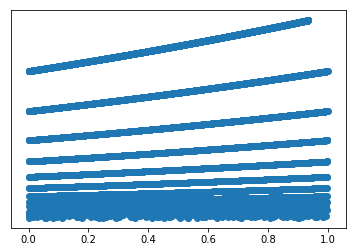

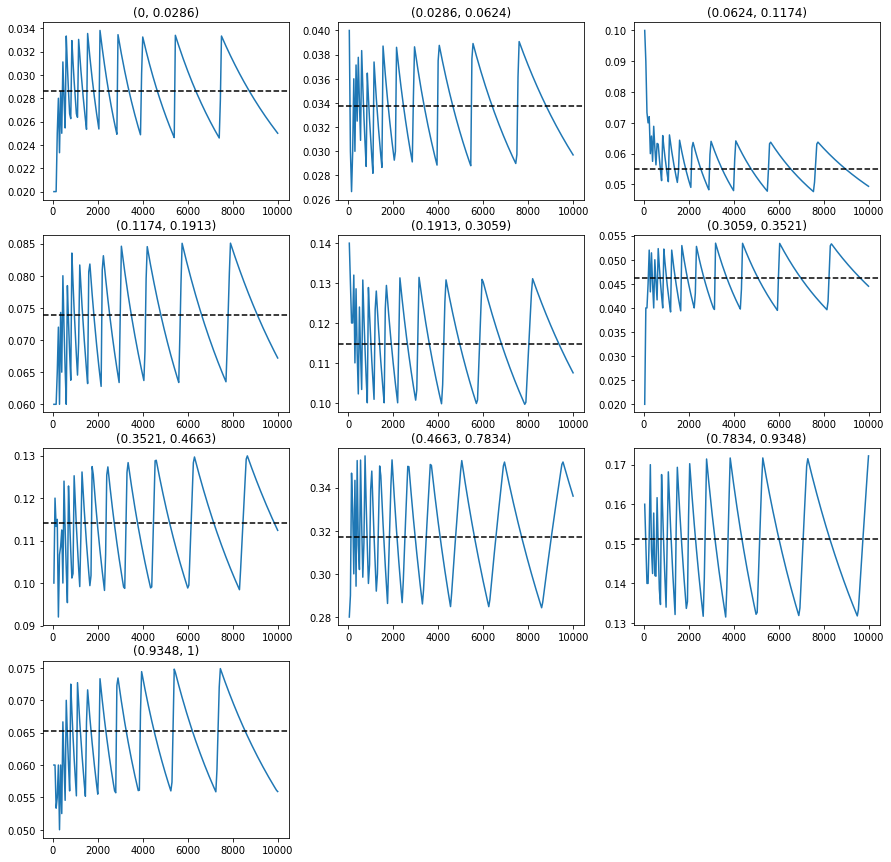

In [212]:
N = 10000
a = math.pi

def first_N_terms_log(a, N):
    result = []
    for i in np.arange(1, N + 1):
        result.append(a * np.log(i) - math.floor(a * np.log(i)))
    return result

sequence_log = first_N_terms_log(a, N)
visualize_equidistribution(sequence_log, 10, 50)

**Proposition 1.6:** For every $a\neq0$, and $\sigma$ with $0<\sigma<1$, the sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \langle an^\sigma\rangle$, is equidistributed in $[0, 1)$.  

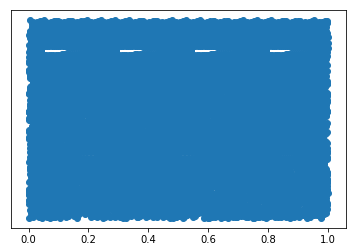

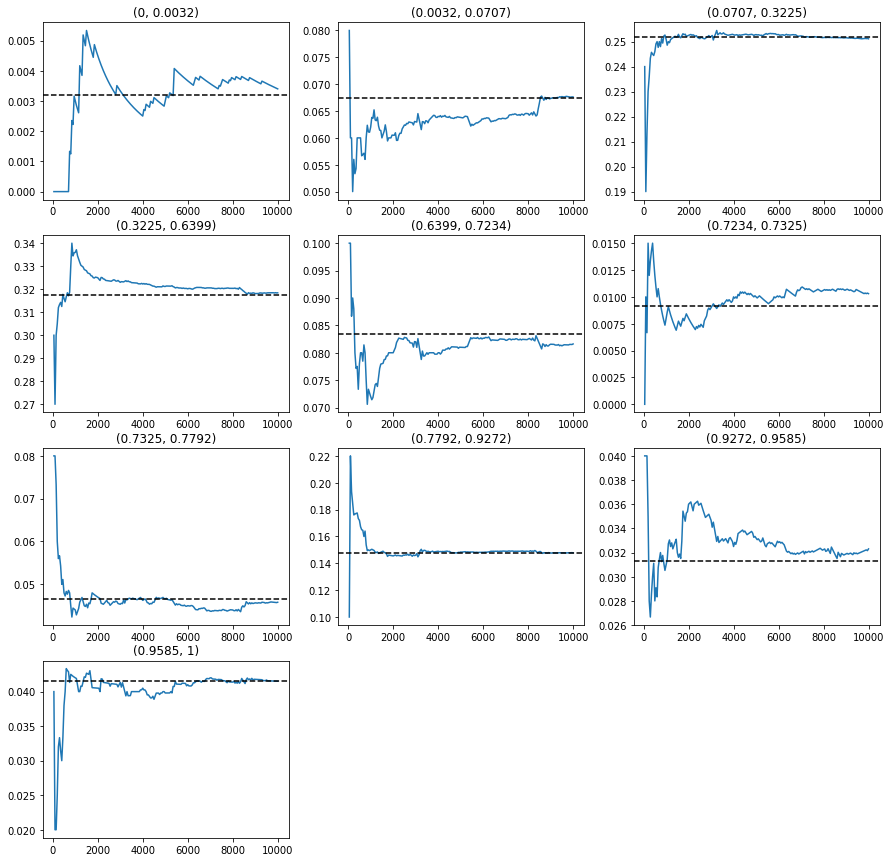

In [217]:
N = 10000
a = 5
sigma = np.sqrt(2) / 2

def first_N_terms_sigma(a, sigma, N):
    result = []
    for i in np.arange(1, N + 1):
        result.append(a * (i ** sigma) - math.floor(a * (i ** sigma)))
    return result

sequence_sigma = first_N_terms_sigma(a, sigma, N)
visualize_equidistribution(sequence_sigma, 10, 50)

**Proposition 1.7:** If $\gamma$ is an irrational number, then the sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \langle n^2\gamma\rangle$, is equidistributed in $[0, 1)$.

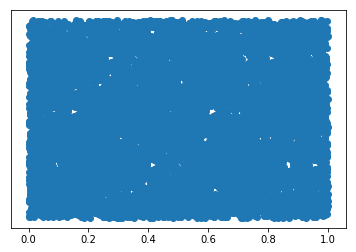

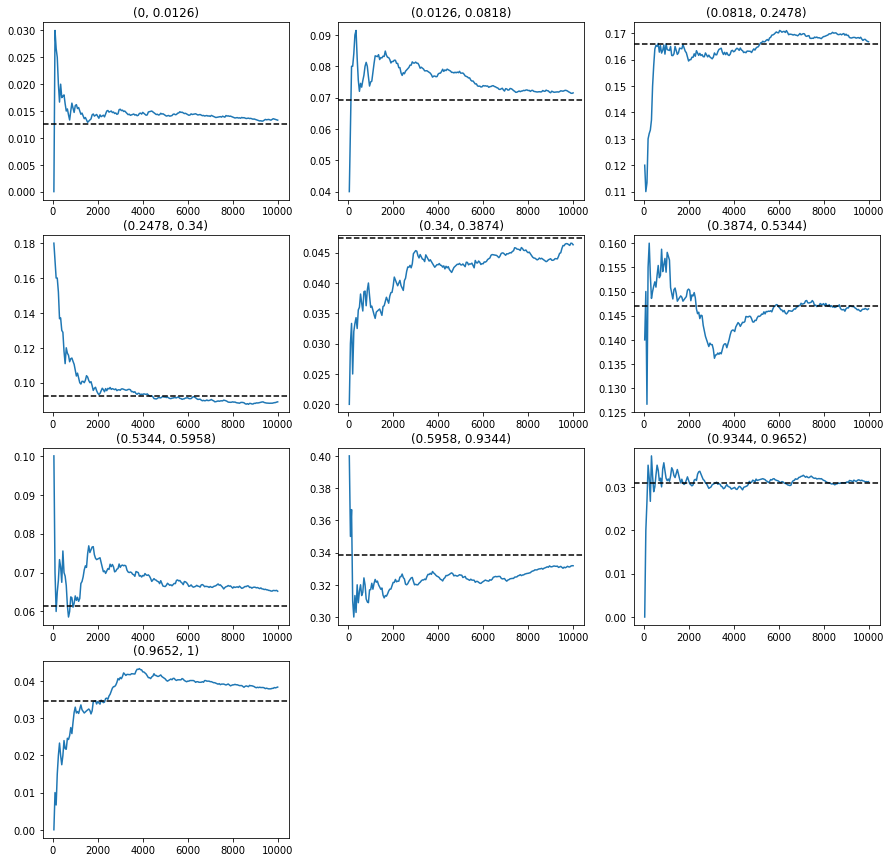

In [220]:
gamma = np.sqrt(3)
N = 10000

def first_N_terms_weyl_squared(gamma, N):
    result = []
    for i in np.arange(1, N + 1):
        result.append((i ** 2) * gamma - math.floor((i ** 2) * gamma))
    return result

sequence_weyl_squared = first_N_terms_weyl_squared(gamma, N)
visualize_equidistribution(sequence_weyl_squared, 10, 50)

**Proposition 1.8:** Suppose $P(x) = c_nx^n + ... +c_0$ is a polynomial with real coefficients, where at least one of $c_1,...,c_n$ is irrational, then the sequence $\{\gamma_n\}_{n=1}^{\infty}$, where $\gamma_n = \langle P(n)\rangle$, is equidistributed in $[0, 1)$.

In [ ]:
coefficients = []
N = 

def first_N_terms_polynomial(coefficients, N):
    result = []
    for i in np.arange(1, N + 1):
        poly = 

Weyl's Equidistribuiton Theorem is introduced to me in an introductory course to Fourier analysis as the way we prove this theorem is a nice application of convergence of Fourier series. The following two theorems are from an analytic number theory course, which are quite surprising results (at least to me) that are much more difficult to prove. 

## 2. Dirichlet's Theorem on Arithmetic Progressions
It is a well known fact that there are infinitely many primes, but can we say anything about the infinitude of primes in some sequence of positive integers? One type of sequence that people are interested in is the arithmetic progression.

**Definition 2.1:** An arithmetic progression is a sequence of (positive) integers such that the difference between consecutive terms is constant.

One can throw me a bunch of examples where there are finitely many primes (or even no primes!). For example, we can take $\{4n\}_{n=1}^{\infty}$. Every single term in this sequence is a multiple of 4, so it cannot be prime. However, Dirichlet's Theorem on Arithmetic Progressions establishs the infinitude of primes for a particular kind of arithmetic progression. The theorem also tells us the "density" of primes in the arithmetic progression, which is defined as follows: <br>

**Definition 2.2:** Let $A$ be a subset of the set of all primes, then A has **analytic density** $\rho$ if

$$
\lim_{s\to1^+} \frac{\sum_{p\in A} p^{-s}}{\ln(\frac{1}{s-1})} = \rho
$$

At the first glance, this seems rather a weird definition for density of primes (it indeed is), and the reason to define it this way is quite deep. In fact, we can show that

$$
\lim_{s\to1^+} \frac{\sum_{p \text{ prime }} p^{-s}}{\ln(\frac{1}{s-1})} = 1
$$

One important property about analytic density is that if $A$ is a finite set, then it has analytic density 0. This means that if $A$ has a positive analytic density, then it must be an infinite set. <br>
Now we can state the main theorem:

**Theorem 2.3 (Dirichlet's Theorem on Arithmetic Progressions):** Fix $N\geq 1$ and an integer $a$ that is coprime to $N$. Let $A = \{p \textit{ prime}: p\equiv a (mod\,N)\}$ (Note: We can think of $A$ as primes in the arithmetic progression $\{a + kN\}_{k\in \mathbb{Z}}$), then $A$ has analytic density $\frac{1}{\phi(N)}$, where $\phi(N)$ is **Euler's totient function**: $\phi(N) = \#\{1\leq k\leq N:gcd(k, N) = 1\}$. In particular, $A$ is infinite. 

Proof of Dirichlet's Theorem will rely heavily on analysis of **Dirichlet characters**. 

## 3. Prime Number Theorem
Probably the most surprising and elegant result in my entire analytic number theory course. Prime Number Theorem tells us the asymptotic behavior of number of primes up to $x$ as $x\rightarrow \infty$. <br>

**Theorem 3.1 (Prime Number Theorem):** Let $\pi(x) = \#\{p \textit{ prime}: p\leq x\}$ number of primes up to x, then

$$
\lim_{x\to\infty} \frac{\pi(x)}{x/\ln(x)} = 1
$$

There is a weaker version of Prime Number Theorem that does not establish the limit but bounds on $\pi(x)$. <br>

**Theorem 3.2 (Chebyshev's Theorem):** For $x\gg\ 0$, there exist constants $A, B > 0$ such that 

$$
A\frac{x}{\ln(x)} < \pi(x) < B\frac{x}{\ln(x)}
$$

Proof of Chebyshev's Theorem is slightly easier, and it makes very good use of the **Von Mangoldt function**: 

$$
\Lambda(n) = 
\begin{cases}
    \ln(p) & \text{if } n = p^r \text{ for some prime } p \text{ and } r \geq 1 \\
    0 & \text{otherwise} 
\end{cases}
$$

Proof of Prime Number Theorem requires more work, which eventually makes use of the **Wiener-Ikehara Theorem** in complex analysis. <br>
If we look at Prime Number Theorem, not only does the number of primes up to x magically have some asymptotic behavior, it also relates to $\ln(x)$, which once again establishes the importance and beauty of $e$.